In [1]:
!pip install ffn
!pip install pandas
!pip install matplotlib

<AxesSubplot:xlabel='Date'>

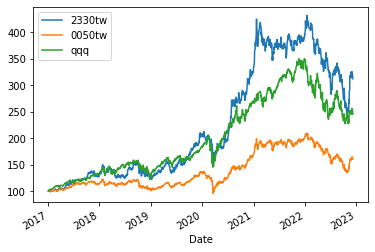

In [11]:
import matplotlib.pyplot as plt
import ffn
import pandas as pd 

#################
#輸入回測之資產 (需要至Yahoo財經查看代碼 https://tw.stock.yahoo.com/quote/2330)

##範例1
#asset = "1101.TW,1102.TW,1215.TW,3430.TWO"

##範例2
#asset = "QQQ,TQQQ,SPY"

##回測資產輸入  (台灣上市股票是.TW ，上櫃股票是TWO)
asset ="2330.TW,0050.TW,qqq"

##權重分配(非必填) ，依照需要回測個數填入相加等於1之值 ,若填空會產出平均分配1組並另外隨機生成10組權重
#Proportion = [0.3,0.3,0.3,0.1] 若有四項資產則即前三檔占比0.3,第四檔占比0.1。
#Proportion = [0.2,0.2,0.2,0.2,0.1,0.1] 若有六項資產可參考此Proportion，算四項占比0.2，後兩項占比0.1

Proportion = []
#################

%matplotlib inline
prices = ffn.get(asset,start='2017-01-01' )#,itot,gld,ivv,uso

prices.to_csv('大擂台用.csv',encoding="utf_8_sig")

prices.rebase().plot()  #畫每個資產走勢

# 創造資產組合(這邊都不用動，只有上面那格需要更改)

平均分配權重
average-asset 2330.TW,0050.TW,qqq [0.33333333 0.33333333 0.33333333]
隨機生成之權重
mutiple_asset1 2330.TW,0050.TW,qqq [0.17592569 0.81648467 0.00758964]
mutiple_asset2 2330.TW,0050.TW,qqq [0.27136151 0.34357708 0.38506141]
mutiple_asset3 2330.TW,0050.TW,qqq [0.5318689 0.2888194 0.1793117]
mutiple_asset4 2330.TW,0050.TW,qqq [0.63705497 0.23483369 0.12811134]
mutiple_asset5 2330.TW,0050.TW,qqq [0.01001311 0.53146052 0.45852637]
mutiple_asset6 2330.TW,0050.TW,qqq [0.11211441 0.50391508 0.38397051]
mutiple_asset7 2330.TW,0050.TW,qqq [0.29684566 0.24065092 0.46250342]
mutiple_asset8 2330.TW,0050.TW,qqq [0.81514828 0.12148929 0.06336243]
mutiple_asset9 2330.TW,0050.TW,qqq [0.12890125 0.71358931 0.15750944]
mutiple_asset10 2330.TW,0050.TW,qqq [0.06377315 0.17860145 0.7576254 ]


stats可以使用參數
Index(['avg_down_month', 'avg_drawdown', 'avg_drawdown_days', 'avg_up_month',
       'best_day', 'best_month', 'best_year', 'cagr', 'calmar', 'daily_kurt',
       'daily_mean', 'daily_sharpe', 'daily_skew

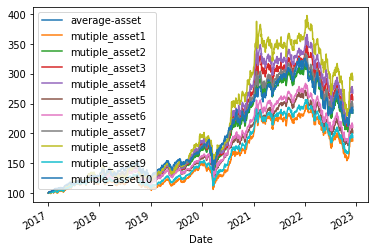

In [12]:
#######這邊都不用動
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


strategies = {}

"""
asset_per = np.zeros((int(len(prices.columns)),int(len(prices.columns))), dtype=float)
for num in range(0,len(prices.columns)) :
    asset_per[num][num] = 1 
    strategies[prices.columns[num]] = (prices.rebase() * asset_per[num]).mean(axis=1).rebase()
"""

if Proportion == [] :
    strategies['average-asset'] = (prices.rebase() * (np.full(len(prices.columns),1/len(prices.columns)))).mean(axis=1).rebase()
    print("平均分配權重")
    print('average-asset' ,asset ,np.full(len(prices.columns),1/len(prices.columns)))
    print("隨機生成之權重")
    average = np.full(len(prices.columns),1/len(prices.columns))
    for i in range(0,10):
        for _ in range(0,10000):
            random_folat = random.uniform(0.01, 0.05)
            random1 = random.randrange(len(prices.columns))
            random2 = random.randrange(len(prices.columns))
            if average[random2] - random_folat > 0:
                average[random1] = average[random1] + random_folat
                average[random2] = average[random2] - random_folat
       
        print('mutiple_asset' + str(i+1),asset ,average)
        strategies['mutiple_asset' + str(i+1)] = (prices.rebase() * average).mean(axis=1).rebase()

else :
    print("權重")
    strategies['Proportion'] = (prices.rebase() * Proportion).mean(axis=1).rebase()
    print('Proportion',asset ,Proportion )
    
strategies = pd.DataFrame(strategies)
strategies.plot()

#隱藏警告 並計算stats
import warnings
warnings.filterwarnings('ignore')

stats = strategies.calc_stats()
stats = pd.DataFrame(
    {
        name:pd.Series({key:getattr(pf, key) for key in dir(pf) if isinstance(getattr(pf, key), float)}, name=name) 
        for name,pf in stats.items()
    }).transpose()
print("\n")
print("stats可以使用參數")
print(stats.columns)


# 資產回測結果

年化報酬
average-asset      0.158735
mutiple_asset1     0.112165
mutiple_asset2     0.154620
mutiple_asset3     0.172227
mutiple_asset4     0.181013
mutiple_asset5     0.125054
mutiple_asset6     0.133527
mutiple_asset7     0.163166
mutiple_asset8     0.196500
mutiple_asset9     0.117739
mutiple_asset10    0.154837
Name: cagr, dtype: float64
最大回撤:
average-asset     -0.368145
mutiple_asset1    -0.380628
mutiple_asset2    -0.363334
mutiple_asset3    -0.392441
mutiple_asset4    -0.405947
mutiple_asset5    -0.340941
mutiple_asset6    -0.350784
mutiple_asset7    -0.364275
mutiple_asset8    -0.423703
mutiple_asset9    -0.353845
mutiple_asset10   -0.348413
Name: max_drawdown, dtype: float64
夏普值
average-asset      0.955745
mutiple_asset1     0.676081
mutiple_asset2     0.950989
mutiple_asset3     0.928150
mutiple_asset4     0.919516
mutiple_asset5     0.814122
mutiple_asset6     0.873616
mutiple_asset7     0.977866
mutiple_asset8     0.915042
mutiple_asset9     0.774770
mutiple_asset10    0.838749

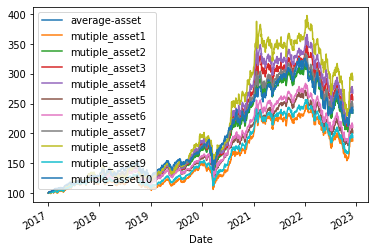

In [13]:
strategies.plot()
print("年化報酬")
print(stats.cagr)
print("最大回撤:")
print(stats.max_drawdown)
print("夏普值")
print(stats.daily_sharpe)